In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import torch
import torchvision
import cv2
import numpy as np
import json
import os

from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
#device = torch.device('cpu')
def get_model_instance_segmentation():
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=False)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, 2)
    return model


model = get_model_instance_segmentation()
model_path = '/content/drive/MyDrive/ML/modelBEST.pt'
              
model.load_state_dict(torch.load(model_path))
model.to(device)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=1e-05)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=1e-05)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=1e-05)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=1e-05)
          (relu

In [17]:
def isInCircle(x, y, size):
    if size==1920:
        y=1080-y
        x=740-x
        r=x*x+y*y
        return r<(630*630)
    else:
        y=720-y
        x=280-x
        r=x*x+y*y
        return r<(235*235)

In [20]:
import cv2

import torchvision.transforms as transforms 
import matplotlib.pyplot as plt
def inference_video(video_input_path, video_output_path, mdl):
    cap = cv2.VideoCapture(video_input_path)
    #out = cv2.VideoWriter(video_output_path, cv2.VideoWriter_fourcc('M','J','P','G'), 10, (1920, 1080))
    # Read until video is completed
    itr=0
    while(cap.isOpened()):
        ret, frame = cap.read()
        itr+=1
        print(itr)
        if ret == True:
            frame = np.array(frame)
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
            transform = transforms.ToTensor()
            img = transform(image).unsqueeze(0)
        
            model.eval()
            im2=img.to(device)
            output = mdl(im2)
            
            for j, i in enumerate(output[0]['boxes'].cpu().detach().numpy()):
                x = abs(int(i[0]-i[2]))
                y = abs(int(i[1]-i[3]))
                if isInCircle(i[0], i[1], 1920) and isInCircle(i[2], i[3], 1920) and output[0]['scores'].cpu().detach().numpy()[j]>0.4:
                    cv2.rectangle(image, [int(i[0]), int(i[1])], [int(i[2]), int(i[3])], (255, 0, 0), 2)
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            cv2.imwrite("/content/img.png", image)
            plt.imshow(image)
            #out.write(image)
            plt.show()
            
        else:
            break
    cap.release()
    #out.release()

1


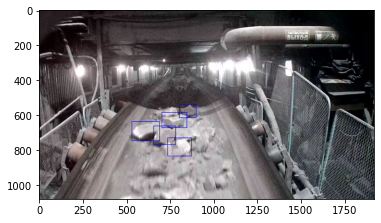

2


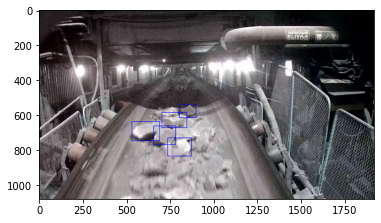

3


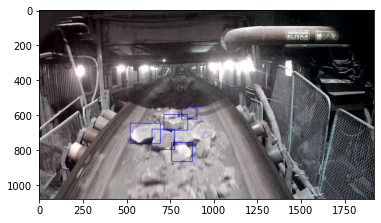

4


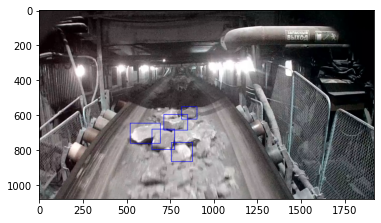

5


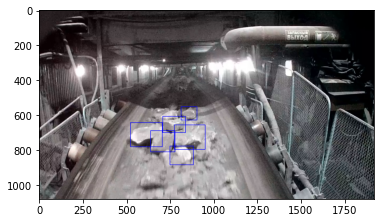

6


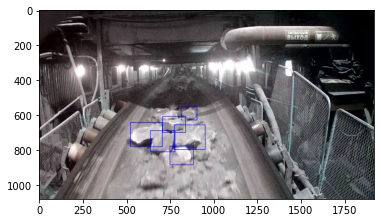

7


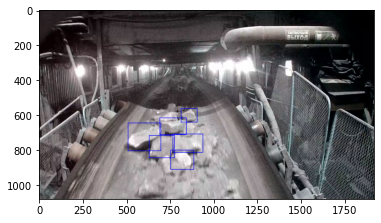

8


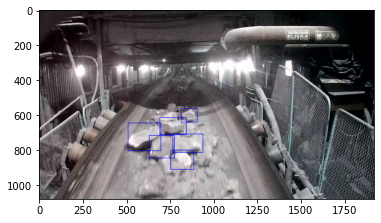

9


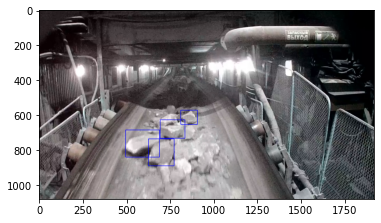

10


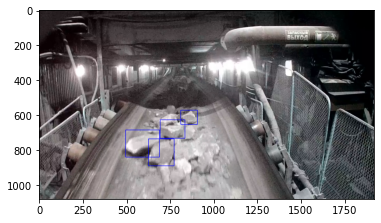

11


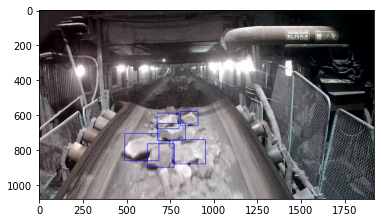

12


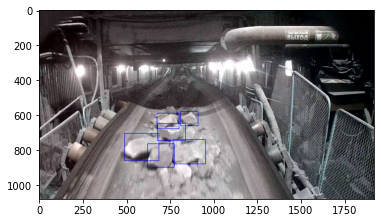

13


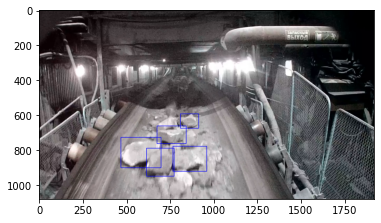

14


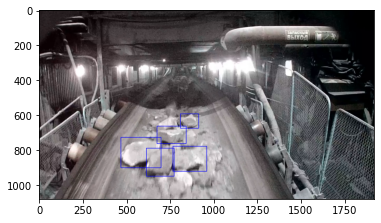

15


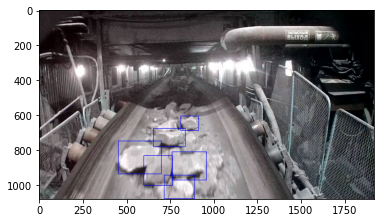

16


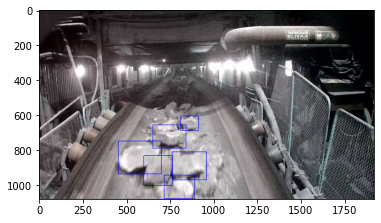

17


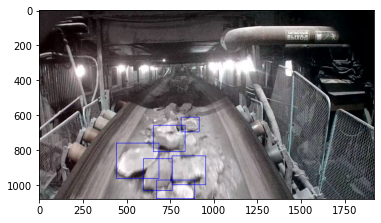

18


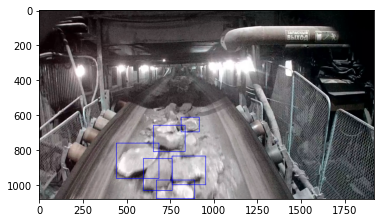

19


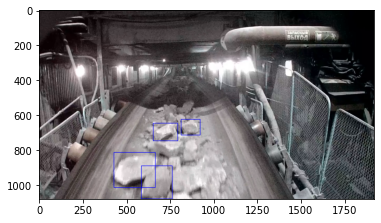

20


KeyboardInterrupt: ignored

In [21]:
inference_video("/content/drive/MyDrive/ML/conv.mp4","/content/drive/MyDrive/ML/avi.avi", model)

In [ ]:
import cv2
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    # Our operations on the frame come here

    # Display the resulting frame
    cv2.imshow(frame)
    if cv2.waitKey(1) == ord('q'):
        break
# When everything done, release the capture
cap.release()